# Analyzing Housing Data for Wake County

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data from csv
data = pd.read_csv("data/WakeCountyHousing.csv")

# Look at a little bit of it (looks good)
data.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0


In [3]:
# Look at some information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308292 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      308292 non-null  int64  
 1   Deeded_Acreage      308292 non-null  float64
 2   Total_Sale_Price    308292 non-null  int64  
 3   Total_Sale_Date     308292 non-null  object 
 4   Month_Year_of_Sale  308292 non-null  object 
 5   Year_of_Sale        308292 non-null  int64  
 6   Year_Built          308292 non-null  int64  
 7   Year_Remodeled      308292 non-null  int64  
 8   Heated_Area         308292 non-null  int64  
 9   Num_Stories         308292 non-null  object 
 10  Design_Style        308292 non-null  object 
 11  Bath                308275 non-null  object 
 12  Utilities           306324 non-null  object 
 13  Physical_City       308183 non-null  object 
 14  Physical_Zip        308146 non-null  float64
dtypes: float64(2), int64(6), object(7)

## Cleaning the Data
In order to clean data, I remove rows that are empty in those areas.

In [4]:
data.dropna(subset=["Bath", "Utilities", "Physical_City", "Physical_Zip"], inplace=True) 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306161 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      306161 non-null  int64  
 1   Deeded_Acreage      306161 non-null  float64
 2   Total_Sale_Price    306161 non-null  int64  
 3   Total_Sale_Date     306161 non-null  object 
 4   Month_Year_of_Sale  306161 non-null  object 
 5   Year_of_Sale        306161 non-null  int64  
 6   Year_Built          306161 non-null  int64  
 7   Year_Remodeled      306161 non-null  int64  
 8   Heated_Area         306161 non-null  int64  
 9   Num_Stories         306161 non-null  object 
 10  Design_Style        306161 non-null  object 
 11  Bath                306161 non-null  object 
 12  Utilities           306161 non-null  object 
 13  Physical_City       306161 non-null  object 
 14  Physical_Zip        306161 non-null  float64
dtypes: float64(2), int64(6), object(7)

## One-Hot Encoding
In order to use categorical data (like Design Style), I will One-Hot Encode it.

In [5]:
design_style = data[["Design_Style"]]   
design_style.value_counts()

Design_Style
Conventional    230881
Townhouse        46347
Condo            11276
Ranch             7448
Split level       7095
Split Foyer       2152
Contemporary       634
Modular            198
Log                 79
Colonial            30
Cape                 8
Conversion           6
Duplex               4
Manuf Multi          3
dtype: int64

In [6]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
design_style_one_hot = one_hot.fit_transform(design_style)

# Let's turn it into an array using the toarray() method

design_style_one_hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Custom Transformer
In order to create new attributes, we use a custom transformer.

In [7]:
# Adding Price per Acre
from sklearn.base import BaseEstimator, TransformerMixin

TotalAcresIndex, TotalPriceIndex = 1, 2

class addCombinedAttr(BaseEstimator, TransformerMixin):
    def __init__(self, add_price_per_room=True):
        self.add_price_per_room = add_price_per_room
    
    def fit(self, X, y=None):
        return self

    def transform(self, data):
        price_per_acre = data.iloc[:, TotalPriceIndex] / data.iloc[:, TotalAcresIndex]
        if self.add_price_per_room:
            return np.c_[price_per_acre]

In [8]:
from sklearn.pipeline import Pipeline

transform_pipe = Pipeline(steps=[
    ('addCombinedAttr', addCombinedAttr())
])

price_per_acre_col = transform_pipe.transform(data)
transformed_data = data
transformed_data["Price_Per_Acre"] = price_per_acre_col

transformed_data.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip,Price_Per_Acre
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0,164285.714286
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0,77173.913043
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0,81521.739130
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0,72916.666667
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0,808510.638298


## Splitting the Data into a Train and Test Set

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=.2, random_state=42)

test_set.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip,Price_Per_Acre
110493,188337,1.37,265000,3/18/2013,March 2013,2013,2012,2012,3028,Other,Conventional,2½ Bath,E,Garner,27529.0,1.934307e+05
184191,289599,0.08,180000,11/24/2004,November 2004,2004,2003,2003,1872,Other,Townhouse,2½ Bath,ALL,Cary,27519.0,2.250000e+06
146943,235350,0.23,180000,6/20/2006,June 2006,2006,1997,1997,2080,Other,Conventional,2½ Bath,ALL,Holly Springs,27540.0,7.826087e+05
124166,206333,1.00,225000,12/29/2011,December 2011,2011,1994,1994,2324,Other,Conventional,3½ Bath,E,Wake Forest,27587.0,2.250000e+05
236026,352272,0.03,187500,1/31/2019,January 2019,2019,2007,2007,1328,Other,Townhouse,2½ Bath,ALL,Apex,27502.0,6.250000e+06


## Random Forest Classifier
Predicting Design Style from Total Sale Price, Year Built, and Deeded Acreage

In [21]:
features = data[['Deeded_Acreage', 'Total_Sale_Price', 'Year_Built']] 
labels = data['Design_Style'] 

# 70% training / 30% testing
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3) 


In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_features=.2)

rfc.fit(x_train,y_train)

RandomForestClassifier(max_features=0.2)

In [50]:
from sklearn import metrics

y_pred_rfc = rfc.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.912595673333406


## K Neighbors Classifier
Predicting Design Style from Total Sale Price, Year Built, and Deeded Acreage

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))


Accuracy: 0.8266720378011737


# OvO Classifier
Predicting Design Style from Total Sale Price, Year Built, and Deeded Acreage

In [42]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression


OvO = OneVsOneClassifier(LogisticRegression())
OvO.fit(x_train, y_train)

y_pred_OvO = OvO.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_OvO))

Accuracy: 0.8822415050789884


## Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rfc)

print(conf_matrix)

[[    0     0     0     0     4     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     7     0     0     0     0     0     0     1
      0]
 [    0     0  3429     0     7     0     0     0     0     0     0     0
      1]
 [    0     0     0     1   204     0     0     0     0     0     1     2
      3]
 [    0     0    25    22 66806     0     1     1     5   617   158   674
    778]
 [    0     0     0     0     1     0     0     0     0     0     0     0
      0]
 [    0     0     0     0    26     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     1     0     0     0     0     0     0     0
      0]
 [    0     0     0     0    65     0     0     0     0     0     0     0
      0]
 [    0     0     1     2  1791     0     0     0     0   287    19   197
      2]
 [    0     0     0     0   481     0     0     0     0    29    23    81
      1]
 [    0     1     0     0  1575     0     0     0     0   214    38   384
      7]
 [  

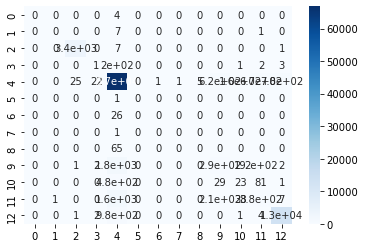

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.show()